# ИТЕРАТОРЫ

В переводе с английского `iterator` означает «перечислитель». В Python это такая структура данных, которая позволяет выдавать объекты по одному, когда её об этом просит пользователь.

Объекты, из которых можно извлечь итератор, называются итерируемыми объектами. Примеры итерируемых объектов — список, кортеж, словарь, множество.

Изучение принципа работы итераторов — наш первый шаг к пониманию работы цикла `for` с различными структурами данных, генераторов, а также работы специальных функций в Python, созданных на их основе.

Работа итератора очень похожа на автомат со сладостями без возможности новой заправки. Клиент подходит к автомату, нажимает на кнопку «Купить» — автомат выдает ему сладость. Клиент снова нажимает на кнопку — автомат выдаёт следующий по очереди товар. Так продолжается до тех пор, пока в автомате не закончатся сладости. Когда клиент попробует обратиться к пустому автомату, тот выдаст ошибку.

Именно такой подход и реализуют итераторы: они выдают своё содержимое по одному элементу, а когда элементы заканчиваются, выдаётся ошибка.

Все встроенные структуры данных в Python, которые поддерживают проход по своим элементам в цикле `for` (списки, словари, множества, кортежи, строки), содержат в себе итераторы и являются итерируемыми объектами. Чтобы получить итератор из структуры, используется функция `iter()`.

Давайте рассмотрим простой пример — создадим  список из трёх чисел и выведем его на экран:

In [1]:
new_list = [12, 14, 16]
print(new_list)
# Будет напечатано:
# [12, 14, 16]

[12, 14, 16]


С помощью `print()` мы узнали содержимое списка `new_list`. Пока что ничего нового нет. 

Теперь извлечём итератор из списка `new_list` с помощью функции `iter()` и занесём его в новую переменную `iter_list`:

In [2]:
# Извлечём итератор из список new_list 
iter_list = iter(new_list) 
print(iter_list)
# Будет напечатано 
# list_iterator object at 0x0000025DAA2D3B50

Теперь вместо содержимого вызов функции `print(iter_list)` показал нам, что `iter_list` — это объект с типом данных `list_iterator`, и он находится в ячейке памяти `0x0000025DAA2D3B50` (ваша ячейка может отличаться). 

А что насчёт привычной для списка индексации? Можем ли мы можем получить элемент по индексу?

In [ ]:
# Попробуем получить значение по индексу 2
print(iter_list[2])
# Возникнет ошибка:
# TypeError: 'list_iterator' object is not subscriptable

Нам не удалось получить конкретный объект по индексу: возникла ошибка, которая сообщает, что объект типа `list_iterator` не позволяет получать его элементы по индексам. Таким образом, можно сделать вывод, что **итераторы не поддерживают индексацию**.

Что же теперь делать с этим итератором?

Оказывается, механизм получения данных из итератора отличается от механизма для привычных нам структур.

К любому итератору можно применить функцию next(), которая возвращает следующий элемент из итератора. Сделаем так четыре раза:

In [ ]:
print(next(iter_list))
print(next(iter_list))
print(next(iter_list))
print(next(iter_list))
# Будет напечатано:
# 12
# 14
# 16
# StopIteration:

В первые три раза всё было в порядке, а вот на четвёртый раз возникла ошибка `StopIteration`. Она означает, что элементы в итераторе закончились и получить из него больше ничего нельзя. При дальнейших попытках обратиться к следующим элементам мы продолжим получать ошибки.

Это связано с тем, что каждый новый вызов `next()` уменьшает количество элементов в итераторе на 1, пока элементы не закончатся полностью.

Работу функции `next()` можно представить в виде следующей схемы:

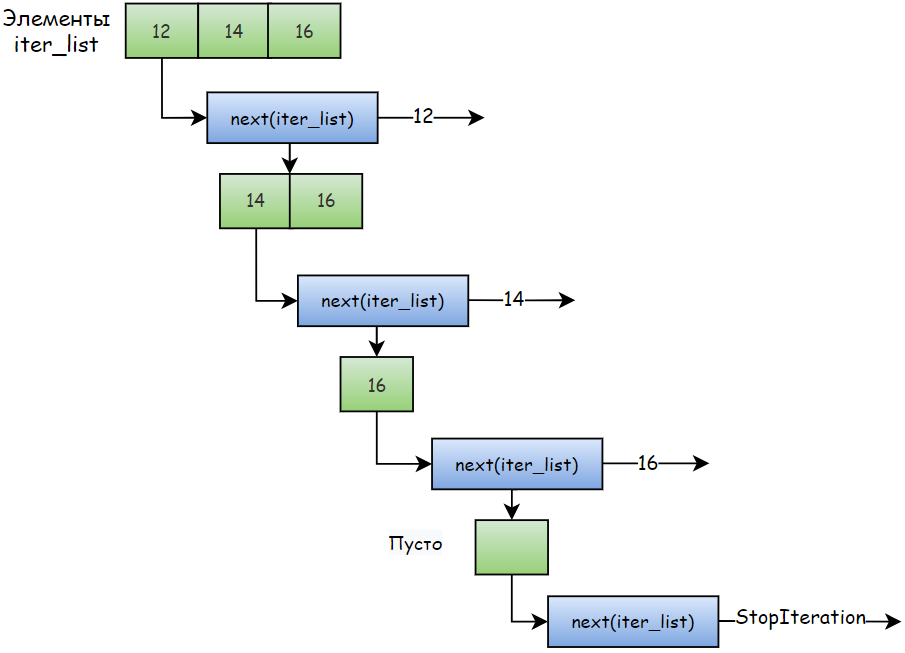

Как видите, итератор является «одноразовым» объектом: как только элементы в итераторе заканчиваются, он становится по сути бесполезным. 

Давайте посмотрим, как перебирать элементы итератора, если мы не знаем заранее, сколько элементов он содержит.

Рассмотрим небольшую задачу: пусть в некотором веб приложении есть список с различными типами пользователей (администраторы, гости и другие), но сами типы и их количество нам не известны. По каким-то причинам нам захотелось вывести весь список типов пользователей через итератор нашего списка.

Можно попробовать сделать это в цикле `while`:

In [ ]:
# Создаём бесконечный цикл while
while True:
    # Выводим следующий объект из итератора
    print(next(iter_users)) 
# Будет напечатано:
# admin
# guest
# root
# anonymous
# StopIteration:

Мы извлекли из списка `users` его итератор и положили в переменную `iter_users`. Далее мы использовали цикл `while`, в теле которого выводили следующий в элемент из итератора с помощью `next()`. Однако, когда мы перебрали все объекты из итератора, мы получили ошибку `StopIteration`, как и раньше.

Однако из-за ошибки прекращается дальнейшая работа программы, что нежелательно. Чтобы программа не ломалась, достаточно добавить обработку исключения `StopIteration` на каждом шаге получения следующего элемента. Напомним, обработка исключений производится с помощью конструкции `try except:`

In [ ]:
# Создаём бесконечный цикл while
while True:
    # Создаём блок обработки исключений
    try:
        # Выводим следующий объект из итератора
        print(next(iter_users))
   # Отлавливаем исключение StopIteration
    except StopIteration:
        # Когда возникает исключение, выводим фразу на экран
        print("User list is over!")
        # Завершаем цикл
        break
 
# Будет напечатано:
# admin
# guest
# root
# anonymous
# User list is over!

Всё, как и в прошлом примере. Мы извлекли из списка `users` его итератор `iter_users`. Далее мы использовали цикл `while`, в теле которого выводили следующий в элемент из итератора с помощью `next()`. Отличие состоит в том, что мы производим действия в блоке `try`, что позволяет нам отловить ошибку `StopIteration` в блоке `except`. Таким образом, когда возникает данная ошибка, мы выводим на экран фразу `"User list is over!"` и завершаем цикл с помощью `break`.

Интересный факт:  в коде ранее мы, сами того не понимая, написали цикл `for`, не используя цикл `for`! Но об этом чуть позже.

Очевидно, что `while` — не самый подходящий цикл для итераторов. Сейчас он больше служил показательным примером, как можно обрабатывать исключение `StopIteration`.

Стандартным способом работы с итератором всё же является цикл `for` в своём обычном обличии. Напомним, что цикл for выполняется до тех пор, пока в последовательности (итераторе) не закончатся элементы. Это как раз то, что нам нужно! Код будет иметь вид:

In [ ]:
# Создаём цикл for по объектам из итератора
for user in iter_users:
    # Выводим текущий элемент на экран
    print(user)
 
# Будет напечатано:
# admin
# guest
# root
# anonymous

Как видите, работать с итераторами в цикле `for` предельно просто — даже обрабатывать исключения не потребовалось. Более того, вы знаете, что не обязательно извлекать итератор из списка — цикл `for` отлично работает и с самим списком.

> Но на самом деле «под капотом» цикл `for` при работе со списком извлекает из него итератор с помощью `iter()` и последовательно вызывает функцию `next()`, а её результат заносит в переменную цикла. Когда элементы закончатся, возникнет ошибка `StopIteration`. Но цикл `for` отлавливает эту ошибку и не производит дальнейших действий. Подробнее об этом можно почитать [здесь](https://habr.com/ru/post/488112/).

Полная схема работы цикла for представлена ниже:

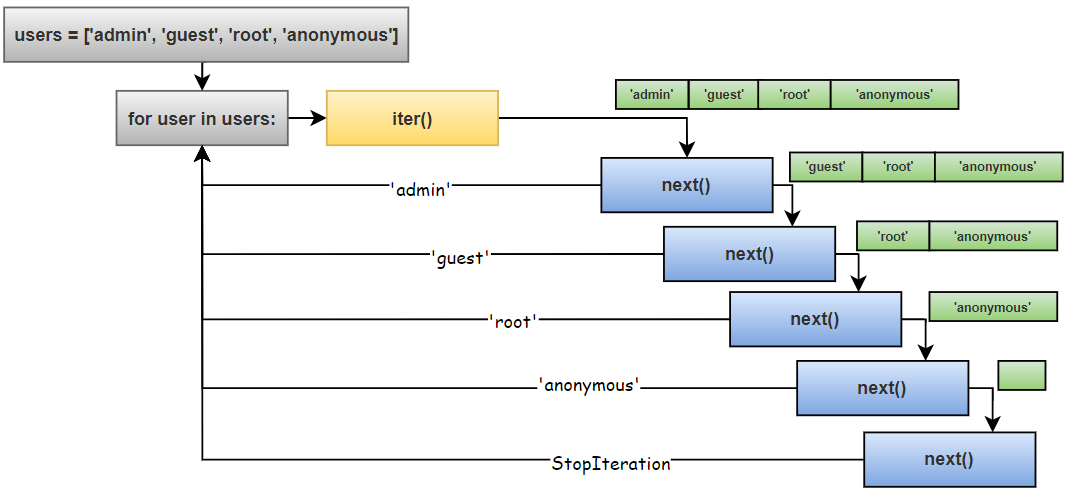

На самом деле вы уже пользовались циклом `for` для работы с итераторами ранее. Например, итерируемым объектом является объект `enumerate`. [Напомним](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/cdd790030b2843c3b2c9b611453caf75), он позволяет получать не только элемент из последовательности, но и его индекс (номер, начиная от `0`).

In [ ]:
# Создаём цикл по элементам и индексам списка users
for i, user in enumerate(users):
    # Выводим индекс и элемент на экран через двоеточие
    print(i, user, sep=': ')
# Будет напечатано:
# 0: admin
# 1: guest
# 2: root
# 3: anonymous

Можно перебирать объекты из объекта `enumerate` по одному, как это было сделано выше в цикле `for`. При этом можно также собрать все элементы из итератора в список с помощью функции `list()`:

In [ ]:
users = ['admin', 'guest', 'root', 'anonymous']

# Создаём итератор enumerate из списка users
enum_users = enumerate(users)
# Получаем список из объекта enumerate
enum_list = list(enum_users)
print(enum_list)
# Будет напечатано:
# [(0, 'admin'), (1, 'guest'), (2, 'root'), (3, 'anonymous')]

Итак, мы сохранили все пары (номер, значение) в список `enum_list`. Предположим, мы захотели продолжить пользоваться объектом `enum_users`, все значения из которого только что, в коде выше, были сохранены в список `enum_list`:

In [ ]:
# Создаём цикл по элементам итератора
for i, user in enum_users:
    print(i, user, sep=': ')
# Ничего не будет напечатано

Почему-то с помощью цикла `for` ничего не было напечатано. Попробуем метод `next()`:

In [ ]:
print(next(enum_users))
# Возникнет ошибка:
# StopIteration:

Возникла ошибка итерации. Дело в том, что в итераторе закончились элементы в тот момент, как только мы получили из него список в примере выше, поэтому попытка получить из него ещё элементы вызвала ошибку.

Однако в цикле `for` ошибка не возникла. Это связано с тем, что цикл `for` не «ругается» на пустой итератор, а просто не совершает с ним никаких действий.

Давайте подведём промежуточный итог по итераторам: 

*   Итератор — это объект-перечислитель, который выдаёт следующий элемент из своих значений с помощью `next()` либо выбрасывает исключение `StopIteration`, когда элементы заканчиваются.
*   Итерируемый объект — это объект, который может предоставить нам итератор. По его содержимому можно пройтись в цикле `for`. Встроенные итерируемые объекты — список, кортеж, строка, словарь, множество
*   Все встроенные итерируемые объекты в Python содержат внутри себя итератор. Чтобы получить его, необходимо использовать функцию `iter()`.
*   Когда мы создаём цикл `for` по итерируемому объекту (например, списку), интерпретатор на самом деле неявно обращается к его итератору через `iter()` и использует функцию `next()`, чтобы получить следующий элемент. Когда цикл доходит до конца объекта, `for` отлавливает исключение `StopIteration` и прекращает свою работу. Вот она — магия Python, которая скрыта от наших глаз. Именно так «под капотом» работает цикл `for`, и теперь вы обладаете этим «тайным знанием».
*   В Python можно создавать свои итераторы и прописывать в них правила выдачи элементов. Например, можно прописать, что выдавать элементы можно только по субботам, или изображения для обучения модели выдаются не по одному, а по 10 штук. Для этого создаются специальные классы с определёнными возможностями (о классах мы поговорим в модуле по ООП). Альтернативным вариантом такого подхода являются генераторы.


Наверняка у вас возник вопрос: а как это связано с функциями? Действительно, всё изложенное выше не даёт нам новых суперспособностей во владении функциями. Мы могли пользоваться циклом `for` и без знания того, как он устроен внутри. Но понимание работы итераторов приближает нас к пониманию более важной темы — генераторов. Всему своё время — совсем скоро мы узнаем ответ на наш вопрос, а пока предлагаем давайте закрепим пройденный материал